In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Implementation of a **Dropout layer**.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv('/content/drive/MyDrive/DL notebooks/sonar_dataset.csv',header=None)

In [10]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
70,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,...,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R
139,0.0164,0.0627,0.0738,0.0608,0.0233,0.1048,0.1338,0.0644,0.1522,0.0780,...,0.0258,0.0143,0.0226,0.0187,0.0185,0.0110,0.0094,0.0078,0.0112,M
106,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092,M
154,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052,M
105,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092,M


In [19]:
for i in df[60]:
  df[i].replace({'M':1,'R':0},inplace=True)

<ipython-input-19-30dd93535bd0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'M':1,'R':0},inplace=True)


In [24]:
df[60]

,60
0,0
1,0
2,0
3,0
4,0
...,...
203,1
204,1
205,1
206,1


In [22]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(60,axis=1),df[60],test_size=0.2,random_state=1)


In [23]:
x_train.shape,x_test.shape

((166, 60), (42, 60))

In [28]:
model = keras.Sequential([
    keras.layers.Dense(60,input_shape = (60,),activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=50,batch_size=8)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5463 - loss: 0.6892
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.6700  
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - loss: 0.6312 
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.6355 
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.5745 
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.5288 
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.5044 
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4368 
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4512 
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4048 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4104 
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - l

In [29]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7475 - loss: 0.7758


[0.7349464297294617, 0.761904776096344]

In [30]:
model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[9.9999344e-01],
       [8.9541934e-02],
       [1.4214820e-02],
       [9.9926609e-01],
       [4.8669124e-05],
       [1.0211058e-03],
       [3.2400441e-01],
       [1.0860478e-04],
       [9.9965715e-01],
       [1.2485563e-05],
       [2.8600711e-01],
       [9.9062330e-01],
       [9.8327303e-01],
       [9.9422365e-01],
       [9.5143551e-01],
       [7.6032847e-01],
       [7.2771730e-03],
       [9.9891436e-01],
       [9.8453760e-01],
       [4.1229546e-04],
       [9.9974936e-01],
       [4.5954799e-05],
       [9.8511457e-01],
       [5.6905625e-04],
       [9.9036825e-01],
       [9.9998820e-01],
       [6.5468311e-01],
       [9.0628123e-01],
       [2.9709077e-04],
       [9.9629349e-01],
       [8.5059159e-02],
       [9.9995971e-01],
       [4.5145918e-02],
       [2.0251565e-01],
       [1.3892179e-02],
       [7.3163612e-03],
       [7.5561902e-04],
       [9.5110732e-01],
       [2.9578044e-03],
       [9.8856735e-01],
       [9.1168404e-01],
       [9.958143

In [34]:
yp = model.predict(x_test)
y_pred = np.round(yp)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [36]:
y_pred[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [38]:
y_test[:10]

,60
186,1
155,1
165,1
200,1
58,0
34,0
151,1
18,0
202,1
62,0


In [55]:
model_d = keras.Sequential([
    keras.layers.Dense(60,input_shape = (60,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(1,activation='sigmoid')
])
model_d.compile(
    optimizer='Nadam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_d.fit(x_train,y_train,epochs=50,batch_size=8)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4306 - loss: 0.7849
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 0.6717 
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 0.6769 
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 0.7044 
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 0.6660 
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 0.6861 
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5205 - loss: 0.6971 
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5072 - loss: 0.6978 
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6271 - loss: 0.6517 
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5829 - loss: 0.6864 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6267 - loss: 0.6393 
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - lo

In [57]:
model_d.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7579 - loss: 0.6207 


[0.5855420827865601, 0.761904776096344]

In [58]:
yp1 = model_d.predict(x_test)
y_pred1 = np.round(yp1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [59]:
y_pred[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [54]:
y_test[:10]

,60
186,1
155,1
165,1
200,1
58,0
34,0
151,1
18,0
202,1
62,0


Text(95.72222222222221, 0.5, 'Truth')

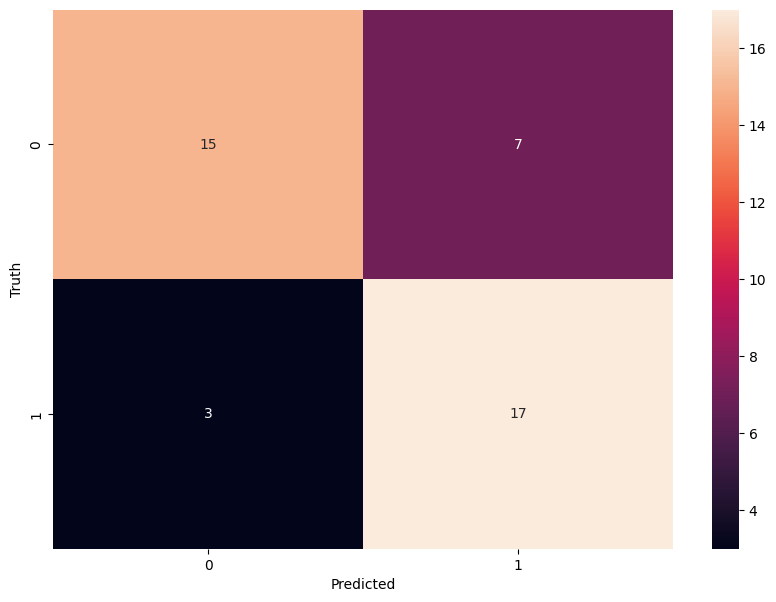

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
